In [117]:
import clustersimpy as cs
import numpy as np 
import matplotlib.pylab as plt 

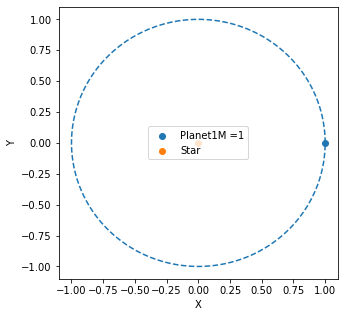

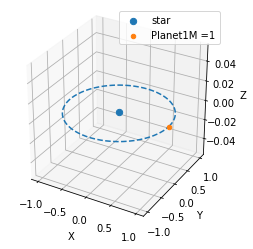

In [118]:
theta = np.array([0])
phi = np.array([0])
a = np.array([1])               #AU
e = np.array([0])
M_star = np.array([1])   
M_planet = np.array([5.9724E-6])

theta_1 = 0
phi = 0 
sig = 0
x = [theta,M_planet,M_star,phi,a,e,theta_1,phi,sig]
System = cs.get_planet(x)
System.calculate_params()
System.graph('2D')
System.graph('3D')

In [119]:
V = System.V_vec
R = System.R_vec

print('Position vector:',R)
print('Velocity Vector:',V)
### Now we need to include the star, since we technically have not included.
R_ = np.vstack((R,np.array([0,0,0])))
print('Combined R vector: ', R_)

V_ = np.vstack((V,np.array([0,0,0])))
print('Combined V vector: ', V_)

Position vector: [[1. 0. 0.]]
Velocity Vector: [[    0.         29846.78916939     0.        ]]
Combined R vector:  [[1. 0. 0.]
 [0. 0. 0.]]
Combined V vector:  [[    0.         29846.78916939     0.        ]
 [    0.             0.             0.        ]]


In [120]:
### Now we also need to create an array of masses, the the code this will be generated for us.
Mass = np.vstack((M_planet,M_star))
print('Mass array:',Mass)   #solar mass

Mass array: [[5.9724e-06]
 [1.0000e+00]]


In [121]:
X = R_[:,0]
Y = R_[:,1]
Z = R_[:,2]
Vx = V_[:,0]
Vy = V_[:,1]
Vz = V_[:,2]
N = np.array([2],dtype=np.int32)
time = np.array([0],dtype=np.double) #million years
units = np.array([1.9884699E33,3.0856775E18,31556952],dtype=np.double)



In [122]:
from scipy.io import FortranFile as FortranFile

Data = FortranFile("Simple_planet_test.dat","w")
Data.write_record(N)
Data.write_record(time)
Data.write_record(units)
Data.write_record(X)
Data.write_record(Y)
Data.write_record(Z)
Data.write_record(Vx)
Data.write_record(Vy)
Data.write_record(Vz)
Data.write_record(Mass)
Data.close()

In [123]:
class nbd_data_struct:
    pass



a = nbd_data_struct() 

f = FortranFile('Simple_planet_test.dat', 'r')
  #
  # number of bodies
a.N = f.read_ints(np.int32)[0]
print('N = ', a.N)
  #
  # time 
a.time = f.read_reals(np.double)[0]
print('time', a.time)
  #
  # unit system
units = f.read_reals(np.double)
a.umass = units[0]
a.udist = units[1]
a.utime = units[2]
print('units', a.umass, a.udist, a.utime)
  #
  # x pos
a.x = f.read_reals(np.double)
  #
  # y pos
a.y = f.read_reals(np.double)
  #
  # z pos
a.z = f.read_reals(np.double)
  #
  # vx pos
a.vx = f.read_reals(np.double)
  # 
  # vy pos
a.vy = f.read_reals(np.double)
  #
  # vz pos
a.vz = f.read_reals(np.double)
  #
  # mass
a.mass = f.read_reals(np.double)
print('mass array', a.mass) 
  #
  # close file!
f.close()

N =  2
time 0.0
units 1.9884699e+33 3.0856775e+18 31556952.0
mass array [5.9724e-06 1.0000e+00]
